In [ ]:
# Install required libraries
!pip install sdv imbalanced-learn pandas numpy matplotlib seaborn scipy scikit-learn

  Using cached sdv-1.33.1-py3-none-any.whl.metadata (14 kB)
  Using cached imbalanced_learn-0.14.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached boto3-1.42.46-py3-none-any.whl.metadata (6.8 kB)
  Using cached botocore-1.42.46-py3-none-any.whl.metadata (5.9 kB)
  Using cached copulas-0.14.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached ctgan-0.12.0-py3-none-any.whl.metadata (10 kB)
  Using cached deepecho-0.8.0-py3-none-any.whl.metadata (11 kB)
  Using cached rdt-1.20.0-py3-none-any.whl.metadata (11 kB)
  Using cached sdmetrics-0.27.0-py3-none-any.whl.metadata (10 kB)
  Using cached s3transfer-0.16.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached sklearn_compat-0.1.5-py3-none-any.whl.metadata (20 kB)
  Using cached torch-2.10.0-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
Using cached sdv-1.33.1-py3-none-any.whl (199 kB)
Using cached boto3-1.42.46-py3-none-any.whl (140 kB)
Using cached botocore-1.42.46-py3-none-any.

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\dhyey\\OneDrive\\Desktop\\task assisment\\.venv\\Lib\\site-packages\\imblearn\\utils\\_tags.py'
Check the permissions.



  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl.metadata (2.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached s3transfer-0.16.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6.9 kB)
  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached markupsafe-3.0.3-cp312-cp312-win_amd64.whl.metadata (2.8 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.6 MB 2.

  You can safely remove it manually.


## STEP 8: Generate Realistic Synthetic Data with Noise

**Problem:** The original synthetic data is perfectly separable (100% accuracy)
**Solution:** Add realistic noise and overlap between hit/non-hit classes to create a more realistic dataset for ML training.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

def generate_realistic_synthetic_data(n_samples=1200):
    """
    Generate synthetic movie data with REALISTIC overlap between hit/non-hit classes.
    This prevents perfect classification and mimics real-world data.
    """
    n_hit = n_samples // 2
    n_non_hit = n_samples - n_hit
    
    # ========== NON-HIT MOVIES (hit=0) ==========
    # Generally lower values but WITH OVERLAP into hit territory
    non_hit_watch_time = np.concatenate([
        np.random.normal(55, 15, int(n_non_hit * 0.7)),  # Core non-hits: low watch time
        np.random.normal(85, 12, int(n_non_hit * 0.3))   # Borderline: higher watch time but still non-hit
    ])
    non_hit_watch_time = np.clip(non_hit_watch_time, 30, 120)
    
    non_hit_completion = np.concatenate([
        np.random.normal(0.55, 0.08, int(n_non_hit * 0.7)),  # Core non-hits
        np.random.normal(0.75, 0.06, int(n_non_hit * 0.3))   # Borderline
    ])
    non_hit_completion = np.clip(non_hit_completion, 0.3, 0.92)
    
    non_hit_ratings = np.concatenate([
        np.random.normal(1500, 600, int(n_non_hit * 0.7)),
        np.random.normal(5000, 1500, int(n_non_hit * 0.3))
    ])
    non_hit_ratings = np.clip(non_hit_ratings, 500, 12000).astype(int)
    
    non_hit_avg_rating = np.concatenate([
        np.random.normal(3.5, 0.4, int(n_non_hit * 0.7)),
        np.random.normal(4.2, 0.25, int(n_non_hit * 0.3))
    ])
    non_hit_avg_rating = np.clip(non_hit_avg_rating, 2.5, 4.6)
    
    # ========== HIT MOVIES (hit=1) ==========
    # Generally higher values but WITH OVERLAP into non-hit territory
    hit_watch_time = np.concatenate([
        np.random.normal(115, 15, int(n_hit * 0.7)),  # Core hits: high watch time
        np.random.normal(75, 12, int(n_hit * 0.3))    # Borderline: lower watch time but still hit
    ])
    hit_watch_time = np.clip(hit_watch_time, 55, 160)
    
    hit_completion = np.concatenate([
        np.random.normal(0.88, 0.05, int(n_hit * 0.7)),  # Core hits
        np.random.normal(0.72, 0.06, int(n_hit * 0.3))   # Borderline
    ])
    hit_completion = np.clip(hit_completion, 0.55, 0.99)
    
    hit_ratings = np.concatenate([
        np.random.normal(9000, 2500, int(n_hit * 0.7)),
        np.random.normal(4000, 1200, int(n_hit * 0.3))
    ])
    hit_ratings = np.clip(hit_ratings, 2000, 20000).astype(int)
    
    hit_avg_rating = np.concatenate([
        np.random.normal(4.5, 0.25, int(n_hit * 0.7)),
        np.random.normal(4.0, 0.3, int(n_hit * 0.3))
    ])
    hit_avg_rating = np.clip(hit_avg_rating, 3.5, 5.0)
    
    # Combine data
    df_non_hit = pd.DataFrame({
        'movie_id': range(1, n_non_hit + 1),
        'avg_watch_time': non_hit_watch_time[:n_non_hit],
        'completion_rate': non_hit_completion[:n_non_hit],
        'ratings_count': non_hit_ratings[:n_non_hit],
        'avg_rating': non_hit_avg_rating[:n_non_hit],
        'hit': 0
    })
    
    df_hit = pd.DataFrame({
        'movie_id': range(n_non_hit + 1, n_samples + 1),
        'avg_watch_time': hit_watch_time[:n_hit],
        'completion_rate': hit_completion[:n_hit],
        'ratings_count': hit_ratings[:n_hit],
        'avg_rating': hit_avg_rating[:n_hit],
        'hit': 1
    })
    
    # Combine and shuffle
    df_combined = pd.concat([df_non_hit, df_hit], ignore_index=True)
    df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)
    df_combined['movie_id'] = range(1, len(df_combined) + 1)
    
    # Round values
    df_combined['avg_watch_time'] = df_combined['avg_watch_time'].round(0).astype(int)
    df_combined['completion_rate'] = df_combined['completion_rate'].round(2)
    df_combined['avg_rating'] = df_combined['avg_rating'].round(1)
    
    return df_combined

# Generate the realistic data
df_realistic = generate_realistic_synthetic_data(1200)
print("Generated Realistic Synthetic Data")
print("=" * 60)
print(f"Shape: {df_realistic.shape}")
print(f"\nClass Distribution:")
print(df_realistic['hit'].value_counts())
print(f"\nFirst 10 rows:")
print(df_realistic.head(10))

Generated Realistic Synthetic Data
Shape: (1200, 6)

Class Distribution:
hit
1    600
0    600
Name: count, dtype: int64

First 10 rows:
   movie_id  avg_watch_time  completion_rate  ratings_count  avg_rating  hit
0         1              82             0.67           6176         3.7    1
1         2              94             0.98           7178         4.2    1
2         3              49             0.63           2095         3.4    0
3         4              84             0.81           3398         4.4    0
4         5              60             0.57           1076         3.6    0
5         6              66             0.75           3270         4.3    1
6         7              86             0.49            924         3.4    0
7         8             108             0.80           9889         4.3    1
8         9              38             0.57            562         3.7    0
9        10             128             0.89           8621         4.6    1


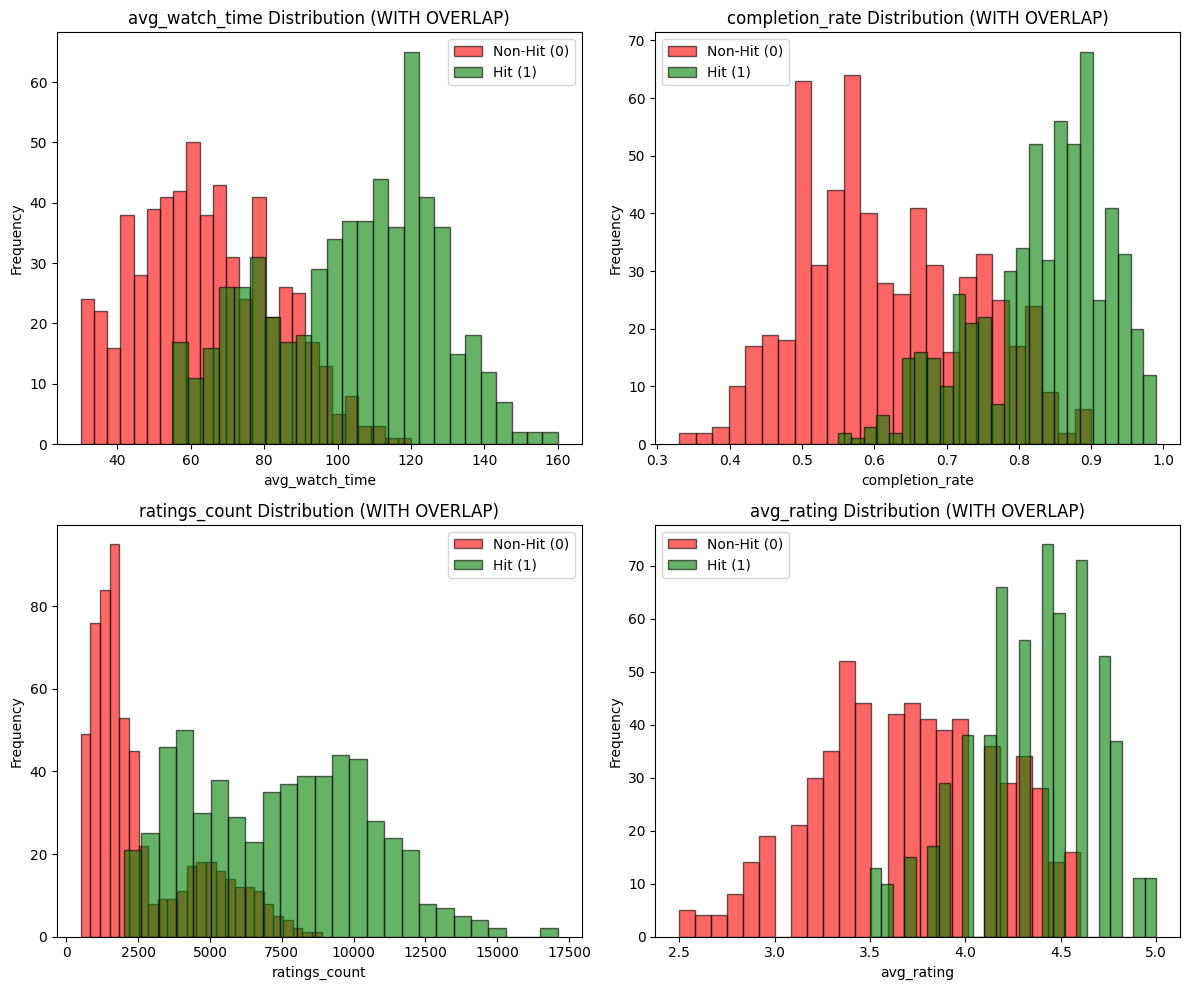


Feature statistics by class:

NON-HIT (0):
       avg_watch_time  completion_rate  ratings_count  avg_rating
count      600.000000       600.000000     600.000000  600.000000
mean        63.981667         0.616800    2628.403333    3.704000
std         18.685196         0.117678    1897.933390    0.474474
min         30.000000         0.330000     500.000000    2.500000
25%         50.000000         0.530000    1313.000000    3.400000
50%         62.500000         0.600000    1833.500000    3.700000
75%         78.000000         0.710000    3821.500000    4.100000
max        120.000000         0.900000    8884.000000    4.600000

HIT (1):
       avg_watch_time  completion_rate  ratings_count  avg_rating
count      600.000000       600.000000     600.000000  600.000000
mean       103.615000         0.832050    7386.380000    4.338000
std         23.151243         0.090949    3088.631588    0.339138
min         55.000000         0.550000    2000.000000    3.500000
25%         85.000000 

In [2]:
# Visualize the overlap between classes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['avg_watch_time', 'completion_rate', 'ratings_count', 'avg_rating']

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    
    hit_data = df_realistic[df_realistic['hit'] == 1][feature]
    non_hit_data = df_realistic[df_realistic['hit'] == 0][feature]
    
    ax.hist(non_hit_data, bins=25, alpha=0.6, label='Non-Hit (0)', color='red', edgecolor='black')
    ax.hist(hit_data, bins=25, alpha=0.6, label='Hit (1)', color='green', edgecolor='black')
    ax.set_title(f'{feature} Distribution (WITH OVERLAP)')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.savefig('../Dataset/synthetic/feature_distribution_overlap.png', dpi=150)
plt.show()

print("\nFeature statistics by class:")
print("=" * 60)
print("\nNON-HIT (0):")
print(df_realistic[df_realistic['hit'] == 0][features].describe())
print("\nHIT (1):")
print(df_realistic[df_realistic['hit'] == 1][features].describe())

In [3]:
# Save the realistic synthetic data
output_path = '../Dataset/synthetic/synthetic_movies_1200.csv'
df_realistic.to_csv(output_path, index=False)
print(f"Saved realistic synthetic data to: {output_path}")
print(f"Total records: {len(df_realistic)}")
print(f"Columns: {list(df_realistic.columns)}")

# Quick sanity check - correlation with hit
print("\n" + "=" * 60)
print("Feature Correlation with 'hit' (lower = harder to predict)")
print("=" * 60)
correlations = df_realistic[features + ['hit']].corr()['hit'].drop('hit').sort_values(ascending=False)
print(correlations)
print("\n(Values between 0.3-0.7 indicate realistic predictive power)")

Saved realistic synthetic data to: ../Dataset/synthetic/synthetic_movies_1200.csv
Total records: 1200
Columns: ['movie_id', 'avg_watch_time', 'completion_rate', 'ratings_count', 'avg_rating', 'hit']

Feature Correlation with 'hit' (lower = harder to predict)
completion_rate    0.715520
avg_watch_time     0.685981
ratings_count      0.680558
avg_rating         0.609756
Name: hit, dtype: float64

(Values between 0.3-0.7 indicate realistic predictive power)
